In [1]:
import swasputils

In [2]:
objects = swasputils.load_objects()

In [3]:
len(objects.index)

289521

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002513957DF10>]],
      dtype=object)

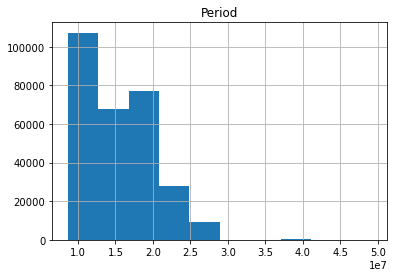

In [4]:
objects.hist(column='Period')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002513C43B280>]],
      dtype=object)

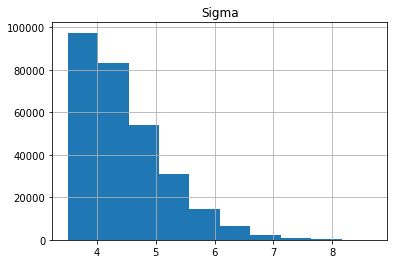

In [5]:
objects.hist(column='Sigma')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002513C661BE0>]],
      dtype=object)

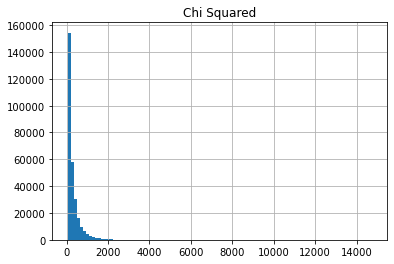

In [8]:
objects.hist(column='Chi Squared', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002512ECA3AC0>]],
      dtype=object)

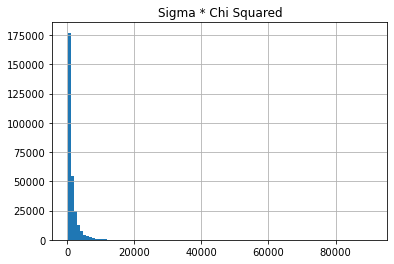

In [9]:
objects['Sigma * Chi Squared'] = objects['Sigma'] * objects['Chi Squared']
objects.hist(column='Sigma * Chi Squared', bins=100)